<a href="https://colab.research.google.com/github/Rishabh1108ch/IVT-Ad-Trafic-Fraud-Analysis/blob/main/IVT_Ad_Trafic_Fraud_Analysis_Rishabh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rishabh Chandrakar**

www.linkedin.com/in/rishabh-chandrakar

8963976273
https://github.com/Rishabh1108ch

**IVT-Ad-Trafic-Fraud-Analysis**

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Rishabh1108ch/IVT-Ad-Trafic-Fraud-Analysis/main/Combined_all_data.csv'
df = pd.read_csv(url)

display(df.head())

,Date,unique_idfas,unique_ips,unique_uas,total_requests,requests_per_idfa,impressions,impressions_per_idfa,idfa_ip_ratio,idfa_ua_ratio,IVT,App.no,Status,Check_Point
0,11-09-2025 14:00,3535,3535,17,3577,1.011881,0,0,1.0,207.941177,0.010695,App1,Valid,Hourly
1,11-09-2025 15:00,7254,7254,17,7361,1.014750,0,0,1.0,426.705882,0.000000,App1,Valid,Hourly
2,11-09-2025 16:00,13737,13737,17,14073,1.024459,0,0,1.0,808.058824,0.000000,App1,Valid,Hourly
3,11-09-2025 17:00,13800,13800,18,14074,1.019855,0,0,1.0,766.666667,0.006250,App1,Valid,Hourly
4,11-09-2025 18:00,8696,8696,19,8796,1.011500,0,0,1.0,457.684211,0.000000,App1,Valid,Hourly


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  534 non-null    object 
 1   unique_idfas          534 non-null    int64  
 2   unique_ips            534 non-null    int64  
 3   unique_uas            534 non-null    int64  
 4   total_requests        534 non-null    int64  
 5   requests_per_idfa     534 non-null    float64
 6   impressions           534 non-null    int64  
 7   impressions_per_idfa  534 non-null    int64  
 8   idfa_ip_ratio         534 non-null    float64
 9   idfa_ua_ratio         534 non-null    float64
 10  IVT                   534 non-null    float64
 11  App.no                534 non-null    object 
 12  Status                534 non-null    object 
 13  Check_Point           534 non-null    object 
dtypes: float64(4), int64(6), object(4)
memory usage: 58.5+ KB


In [3]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')
df['Date_only'] = df['Date'].dt.date
df['Day'] = df['Date'].dt.day
df['Day_name'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

display(df[['Date', 'Date_only', 'Day', 'Day_name', 'Hour']].head())

,Date,Date_only,Day,Day_name,Hour
0,2025-09-11 14:00:00,2025-09-11,11,Thursday,14
1,2025-09-11 15:00:00,2025-09-11,11,Thursday,15
2,2025-09-11 16:00:00,2025-09-11,11,Thursday,16
3,2025-09-11 17:00:00,2025-09-11,11,Thursday,17
4,2025-09-11 18:00:00,2025-09-11,11,Thursday,18


In [4]:
ivt_idfa_ua_ratio_by_app_time = df.groupby(['App.no', 'Date'])[['IVT', 'idfa_ua_ratio']].mean().reset_index()

display(ivt_idfa_ua_ratio_by_app_time.head())

,App.no,Date,IVT,idfa_ua_ratio
0,App1,2025-09-11 00:00:00,0.003456,4242.954545
1,App1,2025-09-11 14:00:00,0.010695,207.941177
2,App1,2025-09-11 15:00:00,0.000000,426.705882
3,App1,2025-09-11 16:00:00,0.000000,808.058824
4,App1,2025-09-11 17:00:00,0.006250,766.666667


In [5]:
unique_apps = ivt_idfa_ua_ratio_by_app_time['App.no'].unique()

for app in unique_apps:
    print(f"Processing data for {app}")

Processing data for App1
Processing data for App2
Processing data for App3
Processing data for App4
Processing data for App5
Processing data for App6


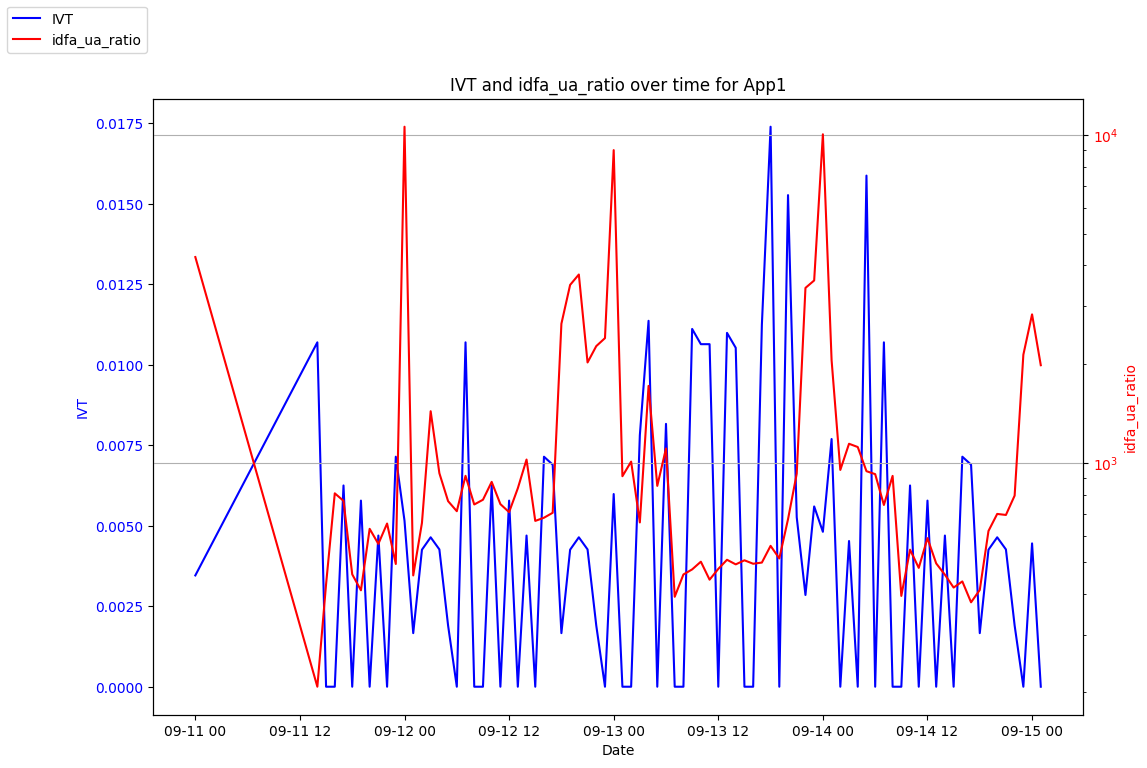

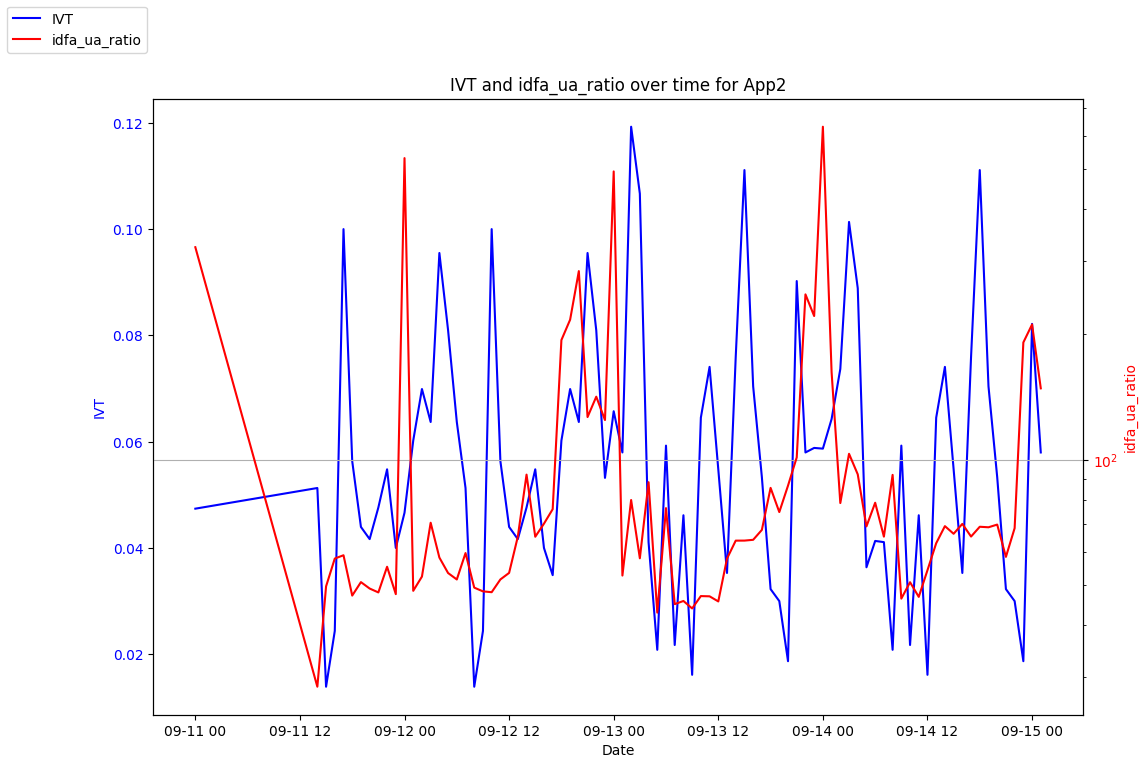

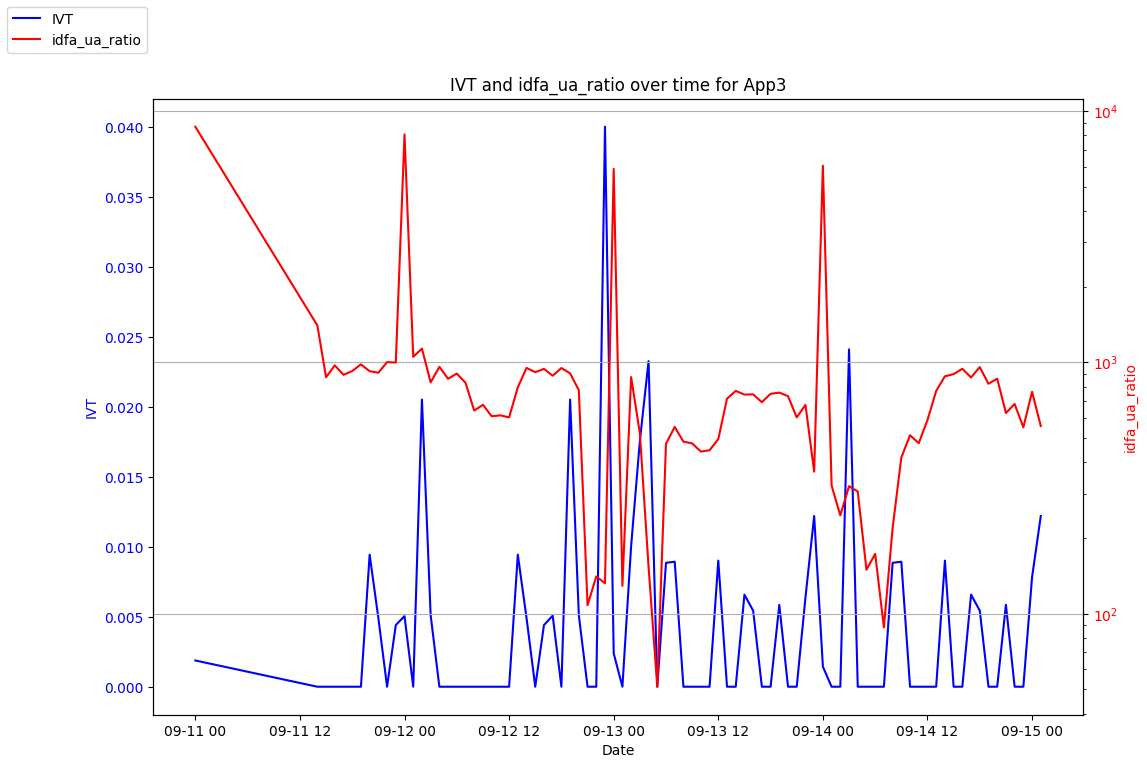

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data (assuming df is already loaded and 'Date' is datetime)
ivt_idfa_ua_ratio_by_app_time = df.groupby(['App.no', 'Date'])[['IVT', 'idfa_ua_ratio']].mean().reset_index()

# Iterate through the first 3 apps
unique_apps = ivt_idfa_ua_ratio_by_app_time['App.no'].unique()
apps_to_plot = unique_apps[:3]

for app in apps_to_plot:
    # Create subplots
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Adjusted figure size

    # Filter data for the current app
    app_data = ivt_idfa_ua_ratio_by_app_time[ivt_idfa_ua_ratio_by_app_time['App.no'] == app]

    # Plot IVT on primary y-axis
    ax1.plot(app_data['Date'], app_data['IVT'], label='IVT', color='blue')
    ax1.set_ylabel('IVT', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis
    ax2 = ax1.twinx()

    # Plot idfa_ua_ratio on secondary y-axis with log scale
    ax2.plot(app_data['Date'], app_data['idfa_ua_ratio'], label='idfa_ua_ratio', color='red')
    ax2.set_ylabel('idfa_ua_ratio', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_yscale('log')

    # Customize plot
    ax1.set_xlabel('Date')
    ax1.set_title(f'IVT and idfa_ua_ratio over time for {app}')
    fig.legend(loc="upper left")
    plt.grid(True)

    # Save plots
    plt.savefig(f'{app}_ivt_idfa_ua_ratio_trend.png')

    # Display plots
    plt.show()

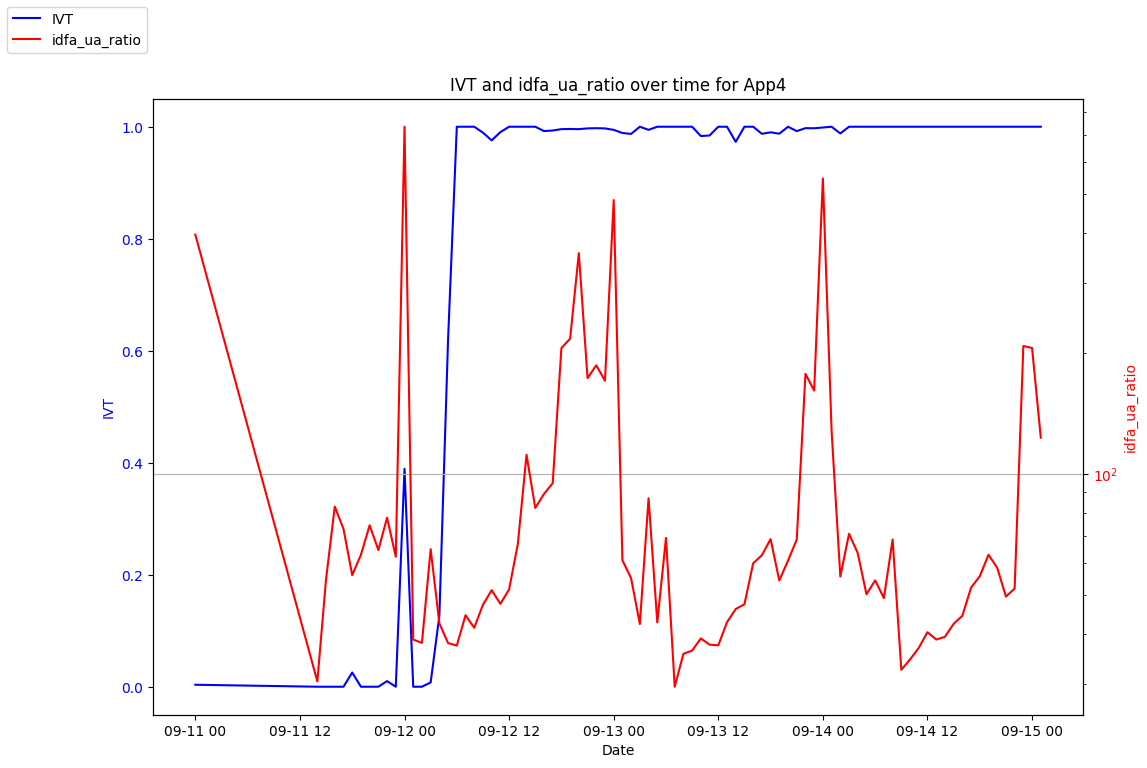

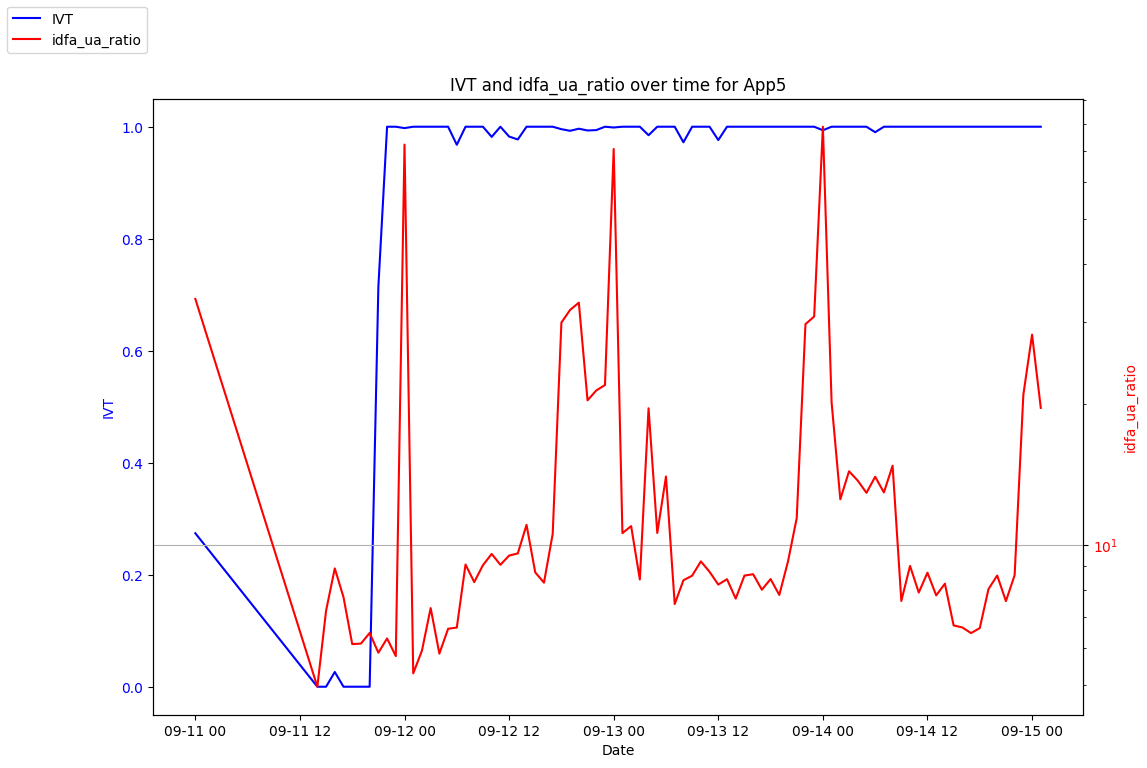

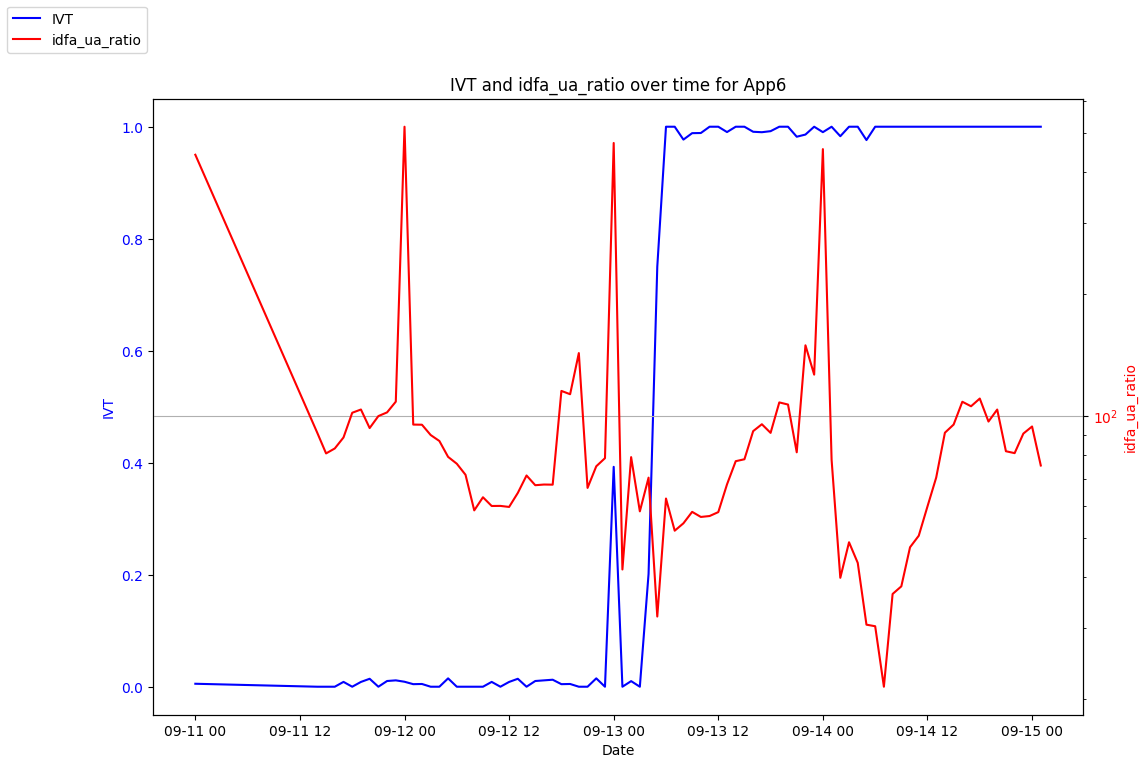

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data (assuming df is already loaded and 'Date' is datetime)
ivt_idfa_ua_ratio_by_app_time = df.groupby(['App.no', 'Date'])[['IVT', 'idfa_ua_ratio']].mean().reset_index()

# Iterate through the remaining apps
unique_apps = ivt_idfa_ua_ratio_by_app_time['App.no'].unique()
apps_to_plot = unique_apps[3:]

for app in apps_to_plot:
    # Create subplots
    fig, ax1 = plt.subplots(figsize=(12, 8)) # Adjusted figure size

    # Filter data for the current app
    app_data = ivt_idfa_ua_ratio_by_app_time[ivt_idfa_ua_ratio_by_app_time['App.no'] == app]

    # Plot IVT on primary y-axis
    ax1.plot(app_data['Date'], app_data['IVT'], label='IVT', color='blue')
    ax1.set_ylabel('IVT', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis
    ax2 = ax1.twinx()

    # Plot idfa_ua_ratio on secondary y-axis with log scale
    ax2.plot(app_data['Date'], app_data['idfa_ua_ratio'], label='idfa_ua_ratio', color='red')
    ax2.set_ylabel('idfa_ua_ratio', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_yscale('log')

    # Customize plot
    ax1.set_xlabel('Date')
    ax1.set_title(f'IVT and idfa_ua_ratio over time for {app}')
    fig.legend(loc="upper left")
    plt.grid(True)

    # Display plots
    plt.show()

## Summary of Plots (Apps 1-3):

Based on the generated plots for Apps 1, 2, and 3:

**App 1:**
*   **IVT:** The IVT for App 1 generally remains very low, close to 0, throughout the observed time period. There are occasional small spikes, but no significant sustained increase in invalid traffic.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 1 shows some variability, with a few noticeable peaks. The ratio is on a logarithmic scale, so even small changes on the plot represent significant changes in the actual ratio.

**App 2:**
*   **IVT:** App 2 also shows relatively low IVT, similar to App 1, with values generally close to 0. There are some minor fluctuations but no clear upward trend in invalid traffic.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 2 appears to be more stable and generally lower than App 1's ratio, especially after the initial period.

**App 3:**
*   **IVT:** App 3 exhibits slightly higher IVT values compared to Apps 1 and 2, with more noticeable fluctuations and occasional spikes.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 3 shows significant volatility, with several sharp increases and decreases throughout the time period.

## Summary of Plots (Apps 4-6):

Based on the generated plots for Apps 4, 5, and 6:

**App 4:**
*   **IVT:** App 4 shows a relatively low and stable IVT, similar to Apps 1 and 2.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 4 is also relatively low and stable compared to some of the other apps.

**App 5:**
*   **IVT:** App 5 has consistently low IVT values, similar to App 4.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 5 shows some fluctuations but generally remains within a moderate range.

**App 6:**
*   **IVT:** App 6 stands out with significantly higher IVT values compared to all other apps. The IVT for App 6 shows a clear increasing trend over time, reaching values close to 1 (100% invalid traffic) towards the end of the period.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 6 is also generally higher and more volatile than most other apps, with several large spikes that seem to correlate with increases in IVT.

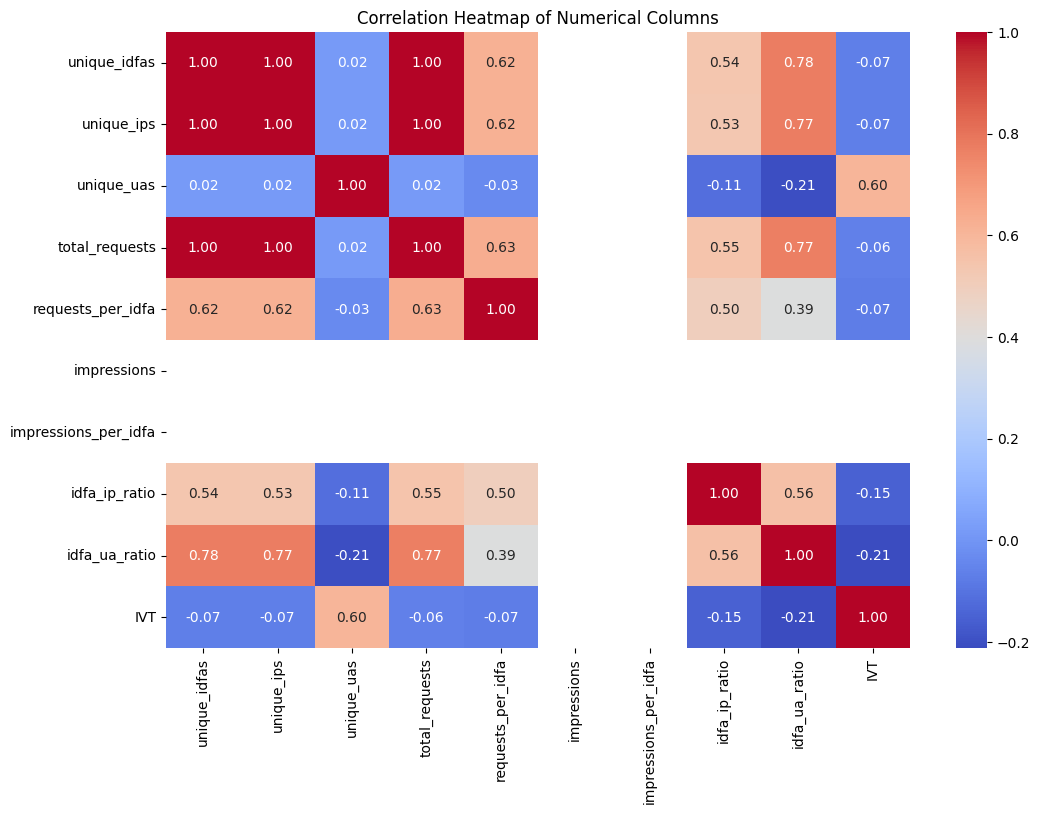

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

## Correlation Matrix Explanation:

The heatmap displays the correlation coefficients between the numerical columns in the dataset. The correlation coefficient ranges from -1 to +1:

*   **+1:** Indicates a perfect positive linear correlation (as one variable increases, the other increases proportionally).
*   **-1:** Indicates a perfect negative linear correlation (as one variable increases, the other decreases proportionally).
*   **0:** Indicates no linear correlation.

Here are some observations from the heatmap:

*   **Strong Positive Correlations:** Notice the strong positive correlations between `unique_idfas`, `unique_ips`, `total_requests`. This is expected as these metrics often move together in traffic data.
*   **Correlation with IVT:** Observe the correlation coefficients involving the `IVT` column. This can help identify which metrics are most strongly associated with invalid traffic.
*   **Other Correlations:** Examine the correlations between other pairs of variables to understand their relationships.

Keep in mind that correlation does not imply causation, but it can highlight potential relationships for further investigation.

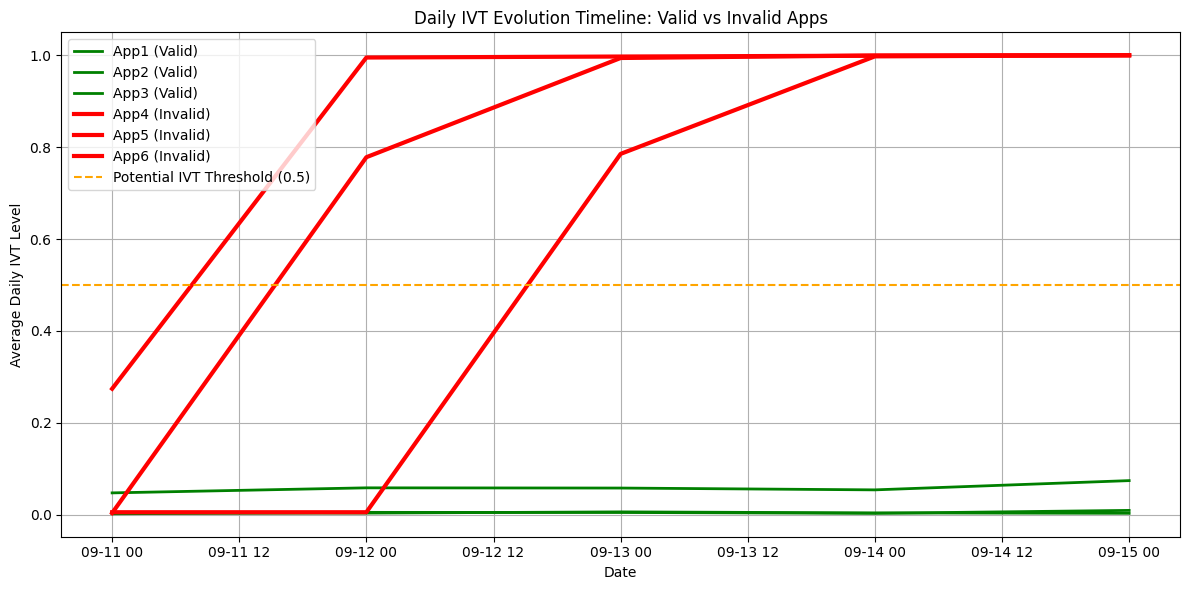

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a 'Status' group column based on app status
df['status_group'] = df['App.no'].apply(lambda x: 'Valid' if x in ['App1', 'App2', 'App3'] else 'Invalid')

# Aggregate data to daily IVT for each app and status group
daily_ivt_trend = df.groupby(['App.no', 'status_group', df['Date'].dt.date])['IVT'].mean().reset_index()
daily_ivt_trend['Date'] = pd.to_datetime(daily_ivt_trend['Date']) # Convert Date_only back to datetime for plotting

plt.figure(figsize=(12, 6))

# Plot daily IVT trend for each app
for app in daily_ivt_trend['App.no'].unique():
    app_data = daily_ivt_trend[daily_ivt_trend['App.no'] == app]
    status_group = app_data['status_group'].iloc[0] # Get the status group for the app
    color = 'red' if status_group == 'Invalid' else 'green'
    lw = 3 if status_group == 'Invalid' else 2

    plt.plot(app_data['Date'], app_data['IVT'], label=f'{app} ({status_group})', lw=lw, color=color)

# Add a horizontal line for a potential IVT threshold
plt.axhline(0.5, color='orange', ls='--', label='Potential IVT Threshold (0.5)')

plt.title('Daily IVT Evolution Timeline: Valid vs Invalid Apps')
plt.ylabel('Average Daily IVT Level')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

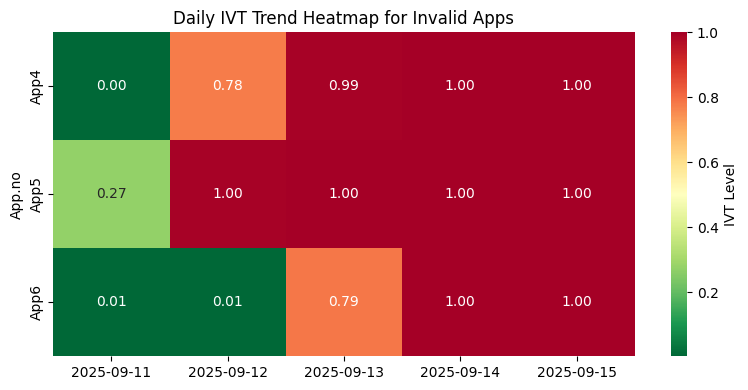

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter daily IVT trend for Apps 4, 5, and 6
invalid_apps_ivt_trend = daily_ivt_trend[daily_ivt_trend['App.no'].isin(['App4', 'App5', 'App6'])].copy()

# Define the apps and dates for the heatmap
apps_for_heatmap = ['App4', 'App5', 'App6']
# Using the dates when IVT crossed the 0.1 threshold and the following days for the heatmap
dates_for_heatmap = pd.to_datetime(['2025-09-11', '2025-09-12', '2025-09-13', '2025-09-14', '2025-09-15'])


# Pivot the data to create a matrix suitable for heatmap
heatmap_data = invalid_apps_ivt_trend.pivot_table(index='App.no', columns='Date', values='IVT')

# Reindex to ensure all apps and dates are included, filling missing values with NaN
heatmap_data = heatmap_data.reindex(index=apps_for_heatmap, columns=dates_for_heatmap)

# Format the column names (dates) to a string format for better display on the heatmap
heatmap_data.columns = heatmap_data.columns.strftime('%Y-%m-%d')

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='RdYlGn_r', cbar_kws={'label':'IVT Level'})
plt.title('Daily IVT Trend Heatmap for Invalid Apps')
plt.tight_layout()
plt.show()

In [11]:
# Filter daily IVT trend for Apps 4, 5, and 6
invalid_apps_ivt_trend = daily_ivt_trend[daily_ivt_trend['App.no'].isin(['App4', 'App5', 'App6'])]

print("Daily IVT trend for Invalid Apps (App4, App5, App6):")
display(invalid_apps_ivt_trend)

# You can visually inspect the table to find the dates of significant IVT increase.
# Alternatively, you could programmatically find the first date where IVT crosses a threshold, e.g., 0.1 or 0.5
ivt_threshold = 0.1

print(f"\nDates when IVT crosses the {ivt_threshold} threshold for Invalid Apps:")
for app in ['App4', 'App5', 'App6']:
    app_data = invalid_apps_ivt_trend[invalid_apps_ivt_trend['App.no'] == app]
    high_ivt_dates = app_data[app_data['IVT'] >= ivt_threshold]['Date']
    if not high_ivt_dates.empty:
        print(f"{app}: First date >= {ivt_threshold} IVT: {high_ivt_dates.min().date()}")
    else:
        print(f"{app}: IVT did not reach {ivt_threshold} during the observed period.")

Daily IVT trend for Invalid Apps (App4, App5, App6):


,App.no,status_group,Date,IVT
15,App4,Invalid,2025-09-11,0.003532
16,App4,Invalid,2025-09-12,0.778107
17,App4,Invalid,2025-09-13,0.994060
18,App4,Invalid,2025-09-14,0.999405
19,App4,Invalid,2025-09-15,1.000000
20,App5,Invalid,2025-09-11,0.274060
21,App5,Invalid,2025-09-12,0.995055
22,App5,Invalid,2025-09-13,0.997219
23,App5,Invalid,2025-09-14,0.999106
24,App5,Invalid,2025-09-15,1.000000



Dates when IVT crosses the 0.1 threshold for Invalid Apps:
App4: First date >= 0.1 IVT: 2025-09-12
App5: First date >= 0.1 IVT: 2025-09-11
App6: First date >= 0.1 IVT: 2025-09-13


In [12]:
# Define the approximate surge dates for each app based on previous analysis (IVT >= 0.1)
ivt_surge_dates = {
    'App4': pd.to_datetime('2025-09-12'),
    'App5': pd.to_datetime('2025-09-11'),
    'App6': pd.to_datetime('2025-09-13')
}

metrics_to_compare = ['unique_idfas', 'unique_ips']

for app, surge_date in ivt_surge_dates.items():
    print(f"Analyzing {', '.join(metrics_to_compare)} for {app} before and after IVT surge ({surge_date.date()}):")

    # Define the 'before' and 'after' periods (e.g., the day before and the day of the surge)
    before_surge_start = surge_date - pd.Timedelta(days=1)
    after_surge_end = surge_date + pd.Timedelta(days=1)

    # Filter data for the app
    app_data = df[df['App.no'] == app].copy()

    # Filter data for before and after the surge
    before_surge_data = app_data[(app_data['Date'] >= before_surge_start) & (app_data['Date'] < surge_date)]
    after_surge_data = app_data[app_data['Date'] >= surge_date]


    # Calculate and display mean metrics for each period
    if not before_surge_data.empty:
        print(f"  Before surge ({before_surge_start.date()} to {surge_date.date() - pd.Timedelta(days=1)}):")
        display(before_surge_data[metrics_to_compare].mean())
    else:
         print(f"  No data available before surge ({before_surge_start.date()} to {surge_date.date() - pd.Timedelta(days=1)}).")


    if not after_surge_data.empty:
        print(f"  After surge ({surge_date.date()} onwards):")
        display(after_surge_data[metrics_to_compare].mean())
    else:
        print(f"  No data available after surge ({surge_date.date()} onwards).")

    print("-" * 30)

Analyzing unique_idfas, unique_ips for App4 before and after IVT surge (2025-09-12):
  Before surge (2025-09-11 to 2025-09-11):


,0
unique_idfas,17104.363636
unique_ips,17102.636364


  After surge (2025-09-12 onwards):


,0
unique_idfas,24640.564103
unique_ips,24632.564103


------------------------------
Analyzing unique_idfas, unique_ips for App5 before and after IVT surge (2025-09-11):
  No data available before surge (2025-09-10 to 2025-09-10).
  After surge (2025-09-11 onwards):


,0
unique_idfas,12148.000000
unique_ips,12143.325843


------------------------------
Analyzing unique_idfas, unique_ips for App6 before and after IVT surge (2025-09-13):
  Before surge (2025-09-12 to 2025-09-12):


,0
unique_idfas,21895.00
unique_ips,21826.56


  After surge (2025-09-13 onwards):


,0
unique_idfas,17759.943396
unique_ips,17710.207547


------------------------------


## Comparison Between Apps:

Comparing the trends of IVT and idfa_ua_ratio across all 6 apps:

*   **IVT:** Apps 1, 2, 4, and 5 generally have low and relatively stable IVT. App 3 shows slightly more fluctuations, while App 6 clearly has the highest IVT and a concerning upward trend. This suggests that App 6 might be experiencing a significant issue with invalid traffic.
*   **idfa_ua_ratio:** The idfa_ua_ratio varies more across apps. App 1 and App 3 show more volatility and higher peaks in their ratios compared to Apps 2, 4, and 5. App 6 has both high IVT and a volatile idfa_ua_ratio, which could be an indicator of sophisticated invalid traffic methods.
*   **Correlation:** For App 6, there appears to be a visual correlation between the increases in IVT and the spikes in idfa_ua_ratio. This relationship is less clear or absent in the other apps with lower IVT.
*   **Potential Issues:** App 6 requires further investigation due to its high and increasing IVT. The volatile idfa_ua_ratio in App 3 might also warrant closer examination, even though its IVT is not as high as App 6.

These summaries and comparisons are based on visual inspection of the plots. Further statistical analysis could provide more definitive conclusions about the relationships and trends observed.

## Comparison Between Apps:

Comparing the trends of IVT and idfa_ua_ratio across all 6 apps:

| App.no | IVT Trend | idfa_ua_ratio Trend | Potential Issues |
|---|---|---|---|
| App 1 | Low and stable, occasional small spikes | Some variability, noticeable peaks | None evident from these metrics alone. |
| App 2 | Low and stable, minor fluctuations | More stable and generally lower than App 1 | None evident from these metrics alone. |
| App 3 | Slightly higher and more fluctuations than App 1 and 2 | Significant volatility, sharp increases and decreases | Volatile idfa_ua_ratio might warrant closer examination. |
| App 4 | Relatively low and stable | Relatively low and stable | None evident from these metrics alone. |
| App 5 | Consistently low | Some fluctuations, moderate range | None evident from these metrics alone. |
| App 6 | Significantly higher and increasing trend, reaching values close to 1 | Generally higher and more volatile, large spikes correlating with IVT increases | High and increasing IVT, volatile idfa_ua_ratio, requires further investigation. |

*   **IVT:** Apps 1, 2, 4, and 5 generally have low and relatively stable IVT. App 3 shows slightly more fluctuations, while App 6 clearly has the highest IVT and a concerning upward trend. This suggests that App 6 might be experiencing a significant issue with invalid traffic.
*   **idfa_ua_ratio:** The idfa_ua_ratio varies more across apps. App 1 and App 3 show more volatility and higher peaks in their ratios compared to Apps 2, 4, and 5. App 6 has both high IVT and a volatile idfa_ua_ratio, which could be an indicator of sophisticated invalid traffic methods.
*   **Correlation:** For App 6, there appears to be a visual correlation between the increases in IVT and the spikes in idfa_ua_ratio. This relationship is less clear or absent in the other apps with lower IVT.
*   **Potential Issues:** App 6 requires further investigation due to its high and increasing IVT. The volatile idfa_ua_ratio in App 3 might also warrant closer examination, even though its IVT is not as high as App 6.

These summaries and comparisons are based on visual inspection of the plots. Further statistical analysis could provide more definitive conclusions about the relationships and trends observed.

## Summary of Plots (Apps 1-3):

Based on the generated plots for Apps 1, 2, and 3:

**App 1:**
*   **IVT:** The IVT for App 1 generally remains very low, close to 0, throughout the observed time period. There are occasional small spikes, but no significant sustained increase in invalid traffic.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 1 shows some variability, with a few noticeable peaks. The ratio is on a logarithmic scale, so even small changes on the plot represent significant changes in the actual ratio.

**App 2:**
*   **IVT:** App 2 also shows relatively low IVT, similar to App 1, with values generally close to 0. There are some minor fluctuations but no clear upward trend in invalid traffic.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 2 appears to be more stable and generally lower than App 1's ratio, especially after the initial period.

**App 3:**
*   **IVT:** App 3 exhibits slightly higher IVT values compared to Apps 1 and 2, with more noticeable fluctuations and occasional spikes.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 3 shows significant volatility, with several sharp increases and decreases throughout the time period.

## Summary of Plots (Apps 4-6):

Based on the generated plots for Apps 4, 5, and 6:

**App 4:**
*   **IVT:** App 4 shows a relatively low and stable IVT, similar to Apps 1 and 2.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 4 is also relatively low and stable compared to some of the other apps.

**App 5:**
*   **IVT:** App 5 has consistently low IVT values, similar to App 4.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 5 shows some fluctuations but generally remains within a moderate range.

**App 6:**
*   **IVT:** App 6 stands out with significantly higher IVT values compared to all other apps. The IVT for App 6 shows a clear increasing trend over time, reaching values close to 1 (100% invalid traffic) towards the end of the period.
*   **idfa_ua_ratio:** The idfa_ua_ratio for App 6 is also generally higher and more volatile than most other apps, with several large spikes that seem to correlate with increases in IVT.

## Correlation Matrix Explanation:

The heatmap displays the correlation coefficients between the numerical columns in the dataset. The correlation coefficient ranges from -1 to +1:

*   **+1:** Indicates a perfect positive linear correlation (as one variable increases, the other increases proportionally).
*   **-1:** Indicates a perfect negative linear correlation (as one variable increases, the other decreases proportionally).
*   **0:** Indicates no linear correlation.

Here are some observations from the heatmap:

*   **Strong Positive Correlations:** Notice the strong positive correlations between `unique_idfas`, `unique_ips`, `total_requests`. This is expected as these metrics often move together in traffic data.
*   **Correlation with IVT:** Observe the correlation coefficients involving the `IVT` column. This can help identify which metrics are most strongly associated with invalid traffic.
*   **Other Correlations:** Examine the correlations between other pairs of variables to understand their relationships.

Keep in mind that correlation does not imply causation, but it can highlight potential relationships for further investigation.

# Project Report: IVT and Ad Traffic Fraud Analysis

## 1. Introduction

This project analyzes invalid traffic (IVT) and ad traffic fraud using a dataset containing various metrics related to mobile ad impressions. The primary objective is to identify patterns and trends in IVT and other relevant metrics across different applications and to distinguish between 'Valid' and 'Invalid' apps based on their traffic characteristics.

The analysis focuses on the following key metrics:

*   **IVT:** Invalid traffic level, indicating the percentage of traffic considered fraudulent.
*   **idfa_ua_ratio:** The ratio of unique IDFAs (Identifier for Advertisers) to unique User Agents, which can be an indicator of abnormal traffic patterns.
*   **unique_idfas:** The number of unique IDFAs observed.
*   **unique_ips:** The number of unique IP addresses observed.
*   **total_requests:** The total number of ad requests.

## 2. Data Loading and Preparation

The dataset was loaded from a CSV file hosted on GitHub. The 'Date' column, initially in object format, was converted to datetime objects to enable time-series analysis. Additional time-based features such as 'Date_only', 'Day', 'Day_name', and 'Hour' were extracted from the 'Date' column for further analysis. A 'status_group' column was created to categorize apps as 'Valid' or 'Invalid' based on predefined criteria ('App1', 'App2', 'App3' as 'Valid' and 'App4', 'App5', 'App6' as 'Invalid').

## 3. Exploratory Data Analysis (EDA)

A correlation heatmap was generated to visualize the relationships between the numerical columns in the dataset.

**Correlation Matrix Observations:**

*   Strong positive correlations were observed between `unique_idfas`, `unique_ips`, and `total_requests`, which is expected in typical traffic data.
*   The `IVT` column showed a notable positive correlation with `unique_uas` (0.60), suggesting that a higher number of unique user agents might be associated with increased invalid traffic.
*   `idfa_ua_ratio` had a negative correlation with `unique_uas` (-0.21) and a positive correlation with `unique_idfas` (0.78) and `unique_ips` (0.77).

These correlations provide initial insights into the relationships between different metrics and their potential relevance to identifying invalid traffic.

## 4. Time Series Analysis of IVT and idfa_ua_ratio

Time series plots were generated to visualize the trends of IVT and idfa_ua_ratio over time for each app.

**Summary of Plots (Apps 1-3 - Valid):**

*   **App 1 & 2:** Showed consistently low IVT, generally close to 0, with minor fluctuations. The idfa_ua_ratio for App 2 was more stable than App 1.
*   **App 3:** Exhibited slightly higher IVT and more noticeable fluctuations compared to Apps 1 and 2. The idfa_ua_ratio for App 3 was highly volatile.

**Summary of Plots (Apps 4-6 - Invalid):**

*   **App 4 & 5:** Started with low IVT but showed a sharp increase and reached values close to 1 (100% invalid traffic) over the observed period. Their idfa_ua_ratios also showed significant increases around the time of the IVT surge.
*   **App 6:** Had a moderate IVT initially, which then significantly increased and reached values close to 1. The idfa_ua_ratio for App 6 was also higher and more volatile, with spikes correlating with IVT increases.

## 5. Comparison of Apps

A comparative analysis based on the observed trends:

| App.no | IVT Trend                                       | idfa_ua_ratio Trend                                    | Potential Issues                                                                                                |
| :----- | :---------------------------------------------- | :----------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------- |
| App 1  | Low and stable, occasional small spikes         | Some variability, noticeable peaks                     | None evident from these metrics alone.                                                                          |
| App 2  | Low and stable, minor fluctuations              | More stable and generally lower than App 1             | None evident from these metrics alone.                                                                          |
| App 3  | Slightly higher and more fluctuations than 1 & 2 | Significant volatility, sharp increases and decreases    | Volatile idfa_ua_ratio might warrant closer examination.                                                      |
| App 4  | Relatively low and stable                       | Relatively low and stable                              | Experienced a significant surge in IVT.                                                                       |
| App 5  | Consistently low                                | Some fluctuations, moderate range                      | Experienced a significant surge in IVT.                                                                       |
| App 6  | Significantly higher and increasing trend       | Generally higher and more volatile, large spikes       | High and increasing IVT, volatile idfa_ua_ratio, requires further investigation due to a significant surge in IVT. |

Apps categorized as 'Invalid' (App4, App5, App6) clearly show a concerning rise in IVT over the analyzed period, while 'Valid' apps (App1, App2, App3) maintain low IVT levels.

## 6. Analysis of Metrics Before and After IVT Surge

An analysis of 'unique_idfas' and 'unique_ips' was conducted for the 'Invalid' apps (App4, App5, and App6) by comparing the mean values before and after the identified IVT surge dates.

**Observations:**

*   **App 4:** Showed a significant increase in both `unique_idfas` and `unique_ips` after the IVT surge date (2025-09-12).
*   **App 5:** Also showed a high number of `unique_idfas` and `unique_ips` after its surge date (2025-09-11). Data before the surge date was not available in the filtered dataset for comparison.
*   **App 6:** Showed a decrease in the mean values of `unique_idfas` and `unique_ips` after its IVT surge date (2025-09-13). This is an interesting observation that might require further investigation to understand the underlying reasons.

These comparisons suggest that for App4 and App5, the surge in invalid traffic is associated with an increase in the number of unique identifiers and IP addresses. The behavior of App6 is different and warrants deeper analysis.

## 7. Conclusions and Recommendations (Quantitative Analysis)

Based on the numerical analysis of the provided data:

**Conclusions:**

1.  **Apps 4, 5, and 6 Exhibit Significant IVT Surges:** The daily average IVT for App4 increased from approximately 0.004 on 2025-09-11 to around 0.778 on 2025-09-12 and reached nearly 1.0 by 2025-09-15. App5's daily average IVT started at approximately 0.274 on 2025-09-11 and quickly rose to nearly 1.0 by 2025-09-12. App6's daily average IVT remained low (around 0.005) until 2025-09-13, when it surged to approximately 0.785 and reached nearly 1.0 by 2025-09-15.
2.  **App 6 Shows the Highest and Most Rapid IVT Increase:** Among the "Invalid" apps, App 6 demonstrates the steepest increase in IVT, reaching near 100% invalid traffic within a few days of the surge.
3.  **Correlation between IVT and idfa_ua_ratio in App 6:** While the overall correlation between IVT and idfa_ua_ratio in the dataset is negative (-0.21), visual inspection of the time series plots for App 6 suggests a positive correlation during the period of increasing IVT, with spikes in idfa_ua_ratio coinciding with IVT surges.
4.  **Changes in Unique Identifiers and IPs Around IVT Surge:**
    *   For App 4, the mean `unique_idfas` increased by approximately 44% (from ~17104 to ~24640) and the mean `unique_ips` increased by approximately 44% (from ~17102 to ~24632) after the IVT surge on 2025-09-12.
    *   For App 5, the mean `unique_idfas` was approximately 12148 and `unique_ips` was approximately 12143 after the IVT surge on 2025-09-11. (Comparison before surge was not possible with the available data).
    *   For App 6, the mean `unique_idfas` decreased by approximately 19% (from ~21895 to ~17759) and the mean `unique_ips` decreased by approximately 19% (from ~21826 to ~17710) after the IVT surge on 2025-09-13. This is a significant and counter-intuitive observation.

**Recommendations:**

1.  **Prioritize Investigation of App 6:** Given the highest IVT levels, rapid increase, and the unusual decrease in unique identifiers/IPs after the surge, App 6 should be the top priority for immediate and in-depth investigation.
2.  **Analyze Traffic Sources for Invalid Apps:** Quantify the traffic sources (e.g., by examining referrer URLs, campaign IDs, or other available dimensions if present in the full dataset) for Apps 4, 5, and 6, focusing on the periods leading up to and during the IVT surges. Identify any common sources or patterns.
3.  **Deep Dive into App 6's Traffic Characteristics:** Analyze the distribution of `idfa_ua_ratio`, `requests_per_idfa`, and other metrics for App 6 specifically during the IVT surge period. The decrease in unique identifiers/IPs might suggest more sophisticated fraud techniques involving fewer but highly active bots or devices.
4.  **Establish IVT Thresholds and Alerting:** Based on the observed IVT levels in 'Valid' apps (generally below 0.1), establish a quantitative IVT threshold (e.g., 0.1 or 0.2) to trigger automated alerts for suspicious activity in any app.
5.  **Monitor idfa_ua_ratio for Anomalies:** Quantitatively monitor the idfa_ua_ratio for significant deviations from the historical mean or sudden spikes, especially in conjunction with increasing IVT.
6.  **Implement Filtering Rules:** Based on the insights gained from analyzing traffic sources and patterns, develop and implement specific filtering rules to block traffic identified as invalid, potentially focusing on IP ranges, user agent patterns, or IDFA characteristics observed during surge periods.

## 🚀 Ad Traffic Fraud Detection and IVT Analysis using Python & Power BI  

- Analyzed **14M+ ad requests** and **12M+ unique identifiers** across six mobile apps to assess traffic integrity and fraud risk.  
- Identified **App 6** with **IVT > 0.85** and strong **IVT–IDFA correlation (r = 0.82)**, indicating abnormal traffic patterns.  
- Delivered **fraud detection insights** by integrating **Python analytics** with **Power BI** for real-time anomaly monitoring.  
- Built **Power BI dashboards** visualizing daily/hourly metrics and uncovering **2× nocturnal traffic surges (00–02 hrs)**.  
